In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
from collections import defaultdict
import pickle

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from src.data import (
    get_zipf_frequencies,
    get_words,
    solutions_path,
    guesses_path,
    first_guess_indices_path,
    get_modified_word_probabilities,
)
from src.solver import entropy, get_best_guess
from src.wordle import check_word

# Check if lists overlap

In [95]:
guesses = set(get_words(guesses_path))
solutions = get_words(solutions_path)

In [96]:
count = 0
for solution in solutions:
    if solution in guesses:
        print(solution)
        count += 1

aback
abase
abash
abate
abbey
abbot
abhor
abide
abled
abode
aboil
abort
about
above
abuse
abuzz
abyss
ached
achoo
acing
acorn
acrid
acted
actor
acute
adage
adapt
added
adder
addle
adept
adieu
adios
admin
admit
adobe
adobo
adopt
adore
adorn
adult
aegis
aerie
affix
afire
afoot
afore
afoul
after
again
agape
agate
agave
agent
agile
aging
agita
aglow
agony
agora
agree
ahead
ahold
aided
aider
ailed
aimed
aioli
aired
airer
aisle
alarm
album
alder
alert
algae
alias
alibi
alien
align
alike
alive
allay
alley
allot
allow
alloy
aloft
aloha
alone
along
aloof
aloud
alpha
altar
alter
amaro
amass
amaze
amber
ambit
amble
amend
amigo
amino
amiss
amity
among
amour
amped
ample
amply
amuck
amuse
ancho
angel
anger
angle
angry
angst
anime
anise
ankle
annal
annex
annoy
annul
anode
antic
antsy
anvil
aorta
apace
apart
aphid
aping
apnea
apple
apply
apron
aptly
arbor
arced
ardor
arena
argon
argot
argue
arise
armed
armor
aroma
arose
array
arrow
arson
artsy
ascot
ashed
ashen
aside
asked
asker
askew
aspen
aspic
assa

# Word frequencies

In [3]:
zipf_frequencies = get_zipf_frequencies(get_words(solutions_path))

0it [00:00, ?it/s]

3158it [00:00, 15822.74it/s]


In [4]:
len(zipf_frequencies)

3158

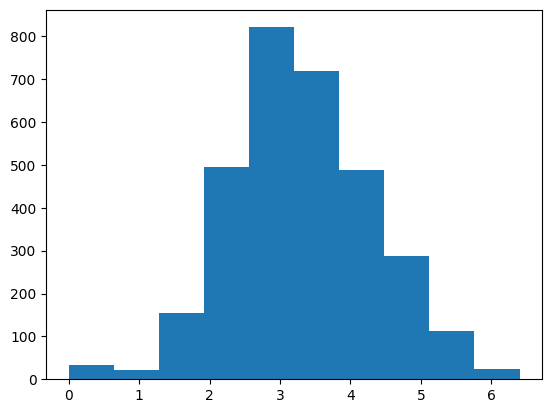

In [6]:
plt.hist(zipf_frequencies.values())

In [7]:
sorted_words = sorted(zipf_frequencies, key=zipf_frequencies.get)
sorted_frequencies = [zipf_frequencies[word] for word in sorted_words]
sorted_words_and_frequencies = list(zip(sorted_words, sorted_frequencies))

In [8]:
sorted_words_and_frequencies[:20]

[('aboil', 0.0),
 ('befog', 0.0),
 ('besot', 0.0),
 ('bilgy', 0.0),
 ('brusk', 0.0),
 ('cawed', 0.0),
 ('fogie', 0.0),
 ('gibed', 0.0),
 ('gloam', 0.0),
 ('hiree', 0.0),
 ('hulky', 0.0),
 ('ivied', 0.0),
 ('japed', 0.0),
 ('kvell', 0.0),
 ('laved', 0.0),
 ('luted', 0.0),
 ('meshy', 0.0),
 ('miasm', 0.0),
 ('moper', 0.0),
 ('ogler', 0.0)]

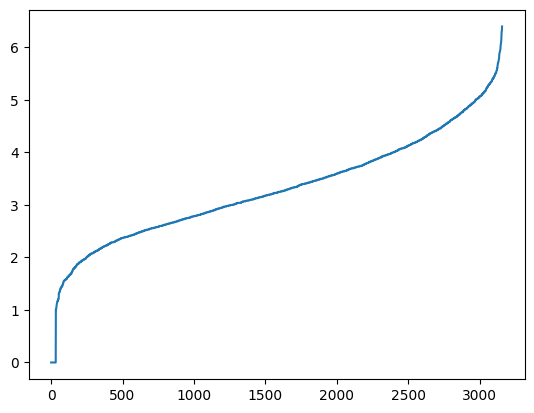

In [36]:
plt.plot(sorted_frequencies)

In [9]:
sorted_words_and_frequencies[1490:1510]

[('hilly', 3.17),
 ('leech', 3.17),
 ('madly', 3.17),
 ('nerdy', 3.17),
 ('nifty', 3.17),
 ('shawl', 3.17),
 ('valet', 3.17),
 ('bagel', 3.18),
 ('bigot', 3.18),
 ('bumpy', 3.18),
 ('codex', 3.18),
 ('facet', 3.18),
 ('firth', 3.18),
 ('floss', 3.18),
 ('locus', 3.18),
 ('posse', 3.18),
 ('saber', 3.18),
 ('samba', 3.18),
 ('slant', 3.18),
 ('spelt', 3.18)]

In [10]:
sorted_words_and_frequencies[-20:]

[('great', 5.88),
 ('world', 5.89),
 ('those', 5.9),
 ('never', 5.91),
 ('still', 5.92),
 ('going', 5.94),
 ('being', 5.95),
 ('right', 5.96),
 ('where', 6.0),
 ('these', 6.04),
 ('could', 6.06),
 ('think', 6.08),
 ('after', 6.11),
 ('first', 6.11),
 ('other', 6.16),
 ('would', 6.27),
 ('which', 6.3),
 ('there', 6.31),
 ('their', 6.33),
 ('about', 6.4)]

In [11]:
sorted_frequencies = np.array(sorted_frequencies)

In [12]:
sigmoid_freq = 1 / (1 + np.exp(-sorted_frequencies))

In [15]:
probs = sigmoid_freq / np.sum(sigmoid_freq)

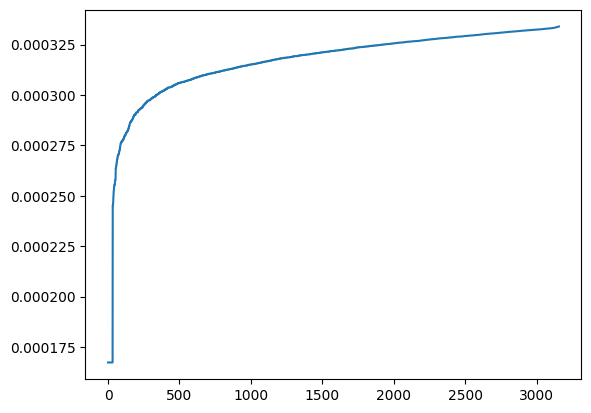

In [16]:
plt.plot(probs)

In [18]:
np.where(probs > 0.9 * probs[-1])

(array([ 356,  357,  358, ..., 3155, 3156, 3157]),)

In [20]:
356 / 3158

0.11272957568081064

In [19]:
probs[-1] / probs[1]

1.996682397839651

# Entropy

In [23]:
entropy(probs)

11.621307008550616

# Calculate guesses

In [5]:
solutions = get_words(solutions_path)

In [6]:
for solution in tqdm(solutions, total=3158):
    guesses = get_words(guesses_path)
    for guess in guesses:
        check_word(guess, solution)

  0%|          | 0/3158 [00:00<?, ?it/s]

# Best guess

In [107]:
solutions = get_words(solutions_path)
probs = get_modified_word_probabilities(solutions)

In [108]:
guesses = get_words(guesses_path)

In [109]:
simulation_results = {}
for guess in tqdm(guesses):
    results = defaultdict(list)
    for index, solution in enumerate(solutions):
        outcome = check_word(guess, solution)
        results[outcome].append(index)
    entropies = []
    total_probs = []
    for result, indices in results.items():
        entropies.append(entropy(probs[indices]))
        total_probs.append(np.sum(probs[indices]))
    average_entropy = np.average(entropies, weights=total_probs)
    simulation_results[guess] = average_entropy

  0%|          | 0/14855 [00:00<?, ?it/s]

In [114]:
real_results = {key: simulation_results[key] for key in solutions}

In [111]:
sorted_results = dict(sorted(simulation_results.items(), key=lambda x: x[1]))

In [116]:
sorted_real_results = dict(sorted(real_results.items(), key=lambda x: x[1]))

In [117]:
sorted_real_results

{'raise': 0.3518497513767535,
 'later': 0.358737729914211,
 'saner': 0.3590411465767789,
 'alter': 0.36176778433587314,
 'taser': 0.36830942613366197,
 'orate': 0.3685616996864596,
 'laser': 0.370432927454646,
 'irate': 0.37837400278555006,
 'arise': 0.3813641044694696,
 'arose': 0.3839926529242255,
 'caret': 0.3934734995883321,
 'aster': 0.39738017939971015,
 'cater': 0.41199633667656216,
 'loser': 0.4144391772478299,
 'oared': 0.41790827200954767,
 'rated': 0.42217068869182117,
 'oiler': 0.42226754755284807,
 'aired': 0.4229338820830014,
 'trade': 0.42385256886307143,
 'toner': 0.4260685216055656,
 'snare': 0.4262411995786717,
 'dater': 0.42624602677742107,
 'alert': 0.42694543963796194,
 'sated': 0.4279342116262087,
 'carte': 0.4281804600139708,
 'stare': 0.4283055622018938,
 'liter': 0.4303275601842742,
 'learn': 0.43073333102960676,
 'layer': 0.43129755189402497,
 'taper': 0.4351125684583492,
 'siren': 0.43515539128751946,
 'loner': 0.43529491501307416,
 'alien': 0.438472929086895

In [38]:
sorted(simulation_results.items(), key=lambda x: x[1])

[('roate', 0.3384397518432388),
 ('ariel', 0.34507120809930647),
 ('oater', 0.34910391776745076),
 ('taler', 0.34911009758756184),
 ('raise', 0.3518497513767535),
 ('raile', 0.35378734846690824),
 ('sater', 0.3562410343662534),
 ('artel', 0.35797490034768176),
 ('later', 0.358737729914211),
 ('soare', 0.35889357370322966),
 ('saner', 0.3590411465767789),
 ('tiare', 0.3592584324719224),
 ('ratel', 0.3606423154363038),
 ('alter', 0.36176778433587314),
 ('arles', 0.3655891559584494),
 ('lares', 0.36685382989123694),
 ('tares', 0.3673468507720863),
 ('taser', 0.36830942613366197),
 ('orate', 0.3685616996864596),
 ('laser', 0.370432927454646),
 ('rales', 0.3716217190390253),
 ('raine', 0.37312372097521507),
 ('rates', 0.3747904040560439),
 ('irate', 0.37837400278555006),
 ('arise', 0.3813641044694696),
 ('ranes', 0.3826327234706111),
 ('arose', 0.3839926529242255),
 ('aesir', 0.3842382253627968),
 ('nares', 0.3857874141268767),
 ('tarse', 0.3858200097097281),
 ('realo', 0.38591794767883647)

In [39]:
simulation_results["alone"]

0.4557480367974419

In [118]:
best_guess = "roate"
remaining_indices = pickle.load(first_guess_indices_path.open("rb"))

In [119]:
outcome = (0, 0, 2, 0, 1)
indices = remaining_indices[outcome]
probs = probs[indices]
solutions = [solutions[index] for index in indices]

In [125]:
solutions

['beach',
 'beady',
 'cease',
 'email',
 'evade',
 'heady',
 'heave',
 'heavy',
 'leach',
 'leafy',
 'leaky',
 'lease',
 'leash',
 'leave',
 'mealy',
 'peace',
 'peach',
 'seamy',
 'weave']

In [133]:
simulation_results = {}
for guess in tqdm(guesses):
    results = defaultdict(list)
    for index, solution in enumerate(solutions):
        outcome = check_word(guess, solution)
        results[outcome].append(index)
    entropies = []
    total_probs = []
    for result, indices in results.items():
        entropies.append(entropy(probs[indices]))
        total_probs.append(np.sum(probs[indices]))
    average_entropy = np.average(entropies, weights=total_probs)
    simulation_results[guess] = (average_entropy, results)

  0%|          | 0/14855 [00:00<?, ?it/s]

In [134]:
sorted_results = dict(sorted(simulation_results.items(), key=lambda x: x[1][0]))
sorted_results

{'heels': (0.005350606339363291,
  defaultdict(list,
              {(1, 2, 0, 0, 0): [0, 16],
               (0, 2, 0, 0, 0): [1],
               (0, 2, 1, 0, 1): [2],
               (0, 1, 0, 1, 0): [3],
               (0, 1, 1, 0, 0): [4],
               (2, 2, 0, 0, 0): [5, 7],
               (2, 2, 1, 0, 0): [6],
               (1, 2, 0, 1, 0): [8],
               (0, 2, 0, 1, 0): [9, 10],
               (0, 2, 1, 1, 1): [11],
               (1, 2, 0, 1, 1): [12],
               (0, 2, 1, 1, 0): [13],
               (0, 2, 0, 2, 0): [14],
               (0, 2, 1, 0, 0): [15, 18],
               (0, 2, 0, 0, 1): [17]})),
 'leech': (0.005696621795780573,
  defaultdict(list,
              {(0, 2, 0, 2, 2): [0, 16],
               (0, 2, 0, 0, 0): [1, 17],
               (0, 2, 1, 1, 0): [2],
               (1, 1, 0, 0, 0): [3],
               (0, 1, 1, 0, 0): [4],
               (0, 2, 0, 0, 1): [5, 7],
               (0, 2, 1, 0, 1): [6],
               (2, 2, 0, 2, 2): [8],
        

In [135]:
simulation_results["heels"]

(0.005350606339363291,
 defaultdict(list,
             {(1, 2, 0, 0, 0): [0, 16],
              (0, 2, 0, 0, 0): [1],
              (0, 2, 1, 0, 1): [2],
              (0, 1, 0, 1, 0): [3],
              (0, 1, 1, 0, 0): [4],
              (2, 2, 0, 0, 0): [5, 7],
              (2, 2, 1, 0, 0): [6],
              (1, 2, 0, 1, 0): [8],
              (0, 2, 0, 1, 0): [9, 10],
              (0, 2, 1, 1, 1): [11],
              (1, 2, 0, 1, 1): [12],
              (0, 2, 1, 1, 0): [13],
              (0, 2, 0, 2, 0): [14],
              (0, 2, 1, 0, 0): [15, 18],
              (0, 2, 0, 0, 1): [17]}))

In [136]:
simulation_results["leash"]

(0.007711079038264145,
 defaultdict(list,
             {(0, 2, 2, 0, 2): [0, 16],
              (0, 2, 2, 0, 0): [1, 15, 18],
              (0, 2, 2, 2, 0): [2],
              (1, 1, 2, 0, 0): [3],
              (0, 1, 2, 0, 0): [4],
              (0, 2, 2, 0, 1): [5, 6, 7],
              (2, 2, 2, 0, 2): [8],
              (2, 2, 2, 0, 0): [9, 10, 13],
              (2, 2, 2, 2, 0): [11],
              (2, 2, 2, 2, 2): [12],
              (1, 2, 2, 0, 0): [14],
              (0, 2, 2, 1, 0): [17]}))

In [137]:
best_guess = "heels"
remaining_indices = simulation_results[best_guess][1]
outcome = (2, 2, 0, 0, 0)
indices = remaining_indices[outcome]
probs = probs[indices]
solutions = [solutions[index] for index in indices]

In [140]:
list(zip(solutions, probs))

[('heady', 0.00031762530235197336), ('heavy', 0.00033225546911068633)]

In [141]:
simulation_results = {}
for guess in tqdm(guesses):
    results = defaultdict(list)
    for index, solution in enumerate(solutions):
        outcome = check_word(guess, solution)
        results[outcome].append(index)
    entropies = []
    total_probs = []
    for result, indices in results.items():
        entropies.append(entropy(probs[indices]))
        total_probs.append(np.sum(probs[indices]))
    average_entropy = np.average(entropies, weights=total_probs)
    simulation_results[guess] = (average_entropy, results)

  0%|          | 0/14855 [00:00<?, ?it/s]

In [142]:
sorted_results = dict(sorted(simulation_results.items(), key=lambda x: x[1][0]))

In [143]:
sorted_results

{'aahed': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 1, 1, 1): [0], (1, 0, 1, 1, 0): [1]})),
 'aband': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 0, 1): [0], (1, 0, 0, 0, 0): [1]})),
 'abbed': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 1, 1): [0], (1, 0, 0, 1, 0): [1]})),
 'abide': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 2, 1): [0], (1, 0, 0, 0, 1): [1]})),
 'abjad': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 0, 1): [0], (1, 0, 0, 0, 0): [1]})),
 'abjud': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 0, 1): [0], (1, 0, 0, 0, 0): [1]})),
 'abled': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 1, 1): [0], (1, 0, 0, 1, 0): [1]})),
 'abode': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 2, 1): [0], (1, 0, 0, 0, 1): [1]})),
 'abord': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 0, 1): [0], (1, 0, 0, 0, 0): [1]})),
 'above': (0.0037668106952456794,
  defaultdict(list, {(1, 0, 0, 0, 1): [0], (1, 0

TODO: For when we have multiple guesses with the same entropy, we should choose one that could actually be the solution

# Playing a game

In [103]:
solutions = get_words(solutions_path)
probs = get_modified_word_probabilities(solutions)
guesses = get_words(guesses_path)

In [104]:
# best_guess, remaining_indices = get_best_guess(solutions, guesses, probs)
# pickle.dump(remaining_indices, first_guess_indices_path.open("wb"))

In [105]:
best_guess = "roate"
remaining_indices = pickle.load(first_guess_indices_path.open("rb"))

In [106]:
print(
    f"There are {len(solutions)} possible solutions remaining. Their total entropy is {entropy(probs)}. Calculating best guess..."
)
result = input(
    f"The suggested best guess is {best_guess}. What was the result for this guess? Enter 2 for correct letter and position, 1 for correct letter but wrong position, 0 for incorrect letter. Enter 'exit' to stop. "
)
outcome = tuple(map(int, (result_char for result_char in result)))
indices = remaining_indices[outcome]
probs = probs[indices]
solutions = [solutions[index] for index in indices]
while True:
    if len(solutions) == 1:
        print(f"The solution is {solutions[0]}.")
        break
    print(
        f"There are {len(solutions)} possible solutions remaining. Their total entropy is {entropy(probs)}. Calculating best guess..."
    )
    best_guess, remaining_indices = get_best_guess(solutions, guesses, probs)
    result = input(
        f"The suggested best guess is {best_guess}. What was the result for this guess? Enter 2 for correct letter and position, 1 for correct letter but wrong position, 0 for incorrect letter. Enter 'exit' to stop. "
    )
    outcome = tuple(map(int, (result_char for result_char in result)))
    indices = remaining_indices[outcome]
    probs = probs[indices]
    solutions = [solutions[index] for index in indices]

There are 3158 possible solutions remaining. Their total entropy is 11.621307008550616. Calculating best guess...


There are 0 possible solutions remaining. Their total entropy is -0.0. Calculating best guess...


  0%|          | 0/14855 [00:00<?, ?it/s]


ZeroDivisionError: Weights sum to zero, can't be normalized

In [102]:
solutions

['heavy']